In [1]:
import pandas as pd

# Load manually downloaded data
rf_data = pd.read_csv('C:/Users/sethi/Desktop/diss code file/datasrc/TB3MS.csv')

# Ensure correct column names
rf_data.columns = ['observation_date', 'TB3MS']
rf_data['date'] = pd.to_datetime(rf_data['observation_date'])  # Convert date to datetime format
rf_data['yyyymm'] = rf_data['date'].dt.strftime('%Y%m').astype(int)  # Convert date to yyyymm
rf_data['rf'] = rf_data['TB3MS']
rf_data = rf_data[['yyyymm', 'rf']]  # Keep only relevant columns

# Merge with stock data
#df = df.merge(rf_data, on='yyyymm', how='left')


In [2]:
# Load the data
df = pd.read_csv('C:/Users/sethi/Desktop/diss code file/datasrc/crspm_and_predictors.csv')

#df['yyyymm'] = pd.to_datetime(df['yyyymm'])  # Convert date to datetime format
#df['yyyymm'] = df['yyyymm'].dt.strftime('%Y%m').astype(int)  # Convert date to yyyymm

In [3]:
import pandas as pd

# Ensure yyyymm is an integer in stock data
df['yyyymm'] = df['yyyymm'].astype(int)

# Ensure risk-free rate data is formatted correctly
rf_data = rf_data[['yyyymm', 'rf']].drop_duplicates()  # Drop duplicates if any
rf_data['yyyymm'] = rf_data['yyyymm'].astype(int)  # Ensure integer format

# Merge with stock data
df = df.merge(rf_data, on='yyyymm', how='left')

# Check for missing risk-free rates after merging
missing_rf = df[df['rf'].isna()]['yyyymm'].unique()
if len(missing_rf) > 0:
    print(f"Warning: Missing risk-free rates for these months: {missing_rf}")


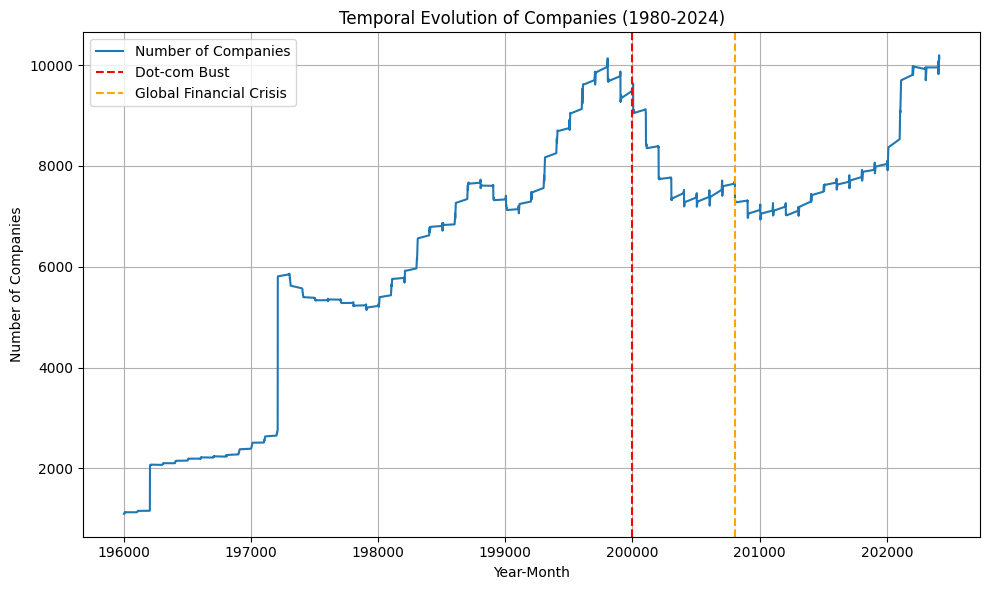

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'yyyymm' is in integer format
df['yyyymm'] = df['yyyymm'].astype(int)

# Count the number of unique companies per month (assuming 'company_id' or 'stock_id' represents individual companies)
company_counts = df.groupby('yyyymm')['permno'].nunique()

# Plotting the temporal evolution of the number of companies
plt.figure(figsize=(10, 6))
plt.plot(company_counts.index, company_counts.values, label="Number of Companies", color='tab:blue')

# Highlighting significant events (dot-com bust and 2008-2009 crisis)
plt.axvline(x=200000, color='red', linestyle='--', label="Dot-com Bust")  # Use the proper yyyymm for the dot-com bust
plt.axvline(x=200809, color='orange', linestyle='--', label="Global Financial Crisis")  # Use the proper yyyymm for the 2008 crisis

# Adding labels and title
plt.title("Temporal Evolution of Companies (1980-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Companies")
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
df.head()

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf,rf
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,0.799007,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791,5.94
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,0.799007,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791,5.91
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,0.802281,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481,5.65
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,0.802281,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481,5.46
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,0.802281,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481,5.57


In [4]:

data = df.copy()

# Make sure the data is still ordered by permno and yyyymm, and apply shift per permno group
data['ret_fwd'] = data.groupby('permno')['ret'].shift(-1)

# Drop rows with NaN values in the ret_fwd column
data = data.dropna(subset=['ret_fwd'])

# Then calculate the excess return
data['excess_ret'] = data['ret_fwd'] - data['rf']


data.head()

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf,rf,ret_fwd,excess_ret
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791,5.94,-36.3636,-42.3036
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791,5.91,100.0000,94.0900
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481,5.65,0.0000,-5.6500
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481,5.46,-7.1429,-12.6029
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481,5.57,0.0000,-5.5700


<Axes: >

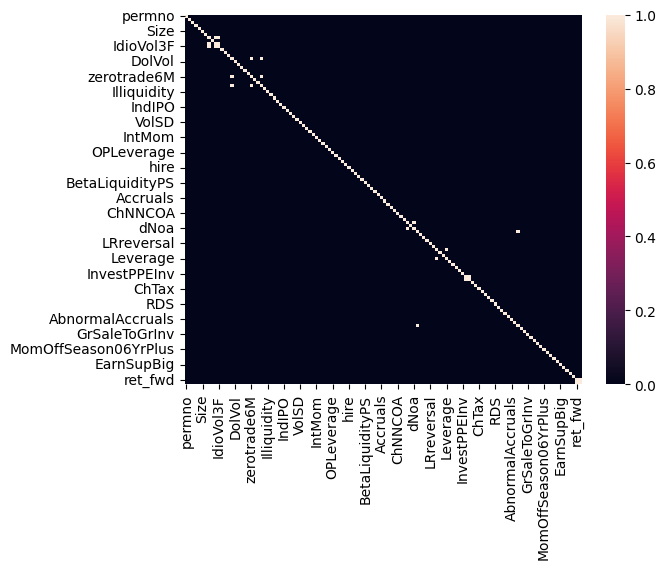

In [5]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr > 0.9)  # visualize highly correlated features

In [5]:
data1 = data[data['yyyymm'] > 198001]  # Filter for test data after the dot-com bust

In [6]:
import pandas as pd

# Example: Load your DataFrame
# df = pd.read_csv('your_file.csv')

# Set the threshold
threshold = 0.4  # 40%

# Drop columns with more than 40% missing values
data_cleaned = data1.loc[:, data1.isnull().mean() <= threshold]

# Optional: print dropped columns
dropped_columns = data1.columns[data1.isnull().mean() > threshold]
print("Dropped columns:", list(dropped_columns))


Dropped columns: ['LRreversal', 'GP', 'InvestPPEInv', 'NetDebtFinance', 'DebtIssuance', 'BM', 'ChInvIA', 'GrSaleToGrOverhead', 'IndRetBig', 'cfp', 'AbnormalAccruals', 'HerfAsset', 'HerfBE', 'VarCF', 'GrSaleToGrInv', 'ShareIss5Y', 'ChAssetTurnover', 'roaq', 'MomSeason06YrPlus', 'MomOffSeason06YrPlus', 'grcapx', 'EntMult', 'Investment', 'PctTotAcc', 'EarnSupBig', 'EarningsSurprise', 'BetaTailRisk', 'CBOperProf']


In [7]:
import pandas as pd

# Example: Load your DataFrame
# df = pd.read_csv('your_file.csv')

# Drop rows with more than 10 missing values
data_cleaned1 = data_cleaned[data_cleaned.isnull().sum(axis=1) <= 10]

# Optional: print number of rows dropped
num_dropped = data_cleaned.shape[0] - data_cleaned1.shape[0]
print(f"Number of rows dropped: {num_dropped}")


Number of rows dropped: 1723456


In [7]:
import pandas as pd

# Example: Load your DataFrame
# df = pd.read_csv('your_file.csv')

# Fill missing values with mean of each column within each permno group
data_filled = data_cleaned.groupby('permno').transform(lambda x: x.fillna(x.mean()))

# Restore non-numeric columns (like 'permno') if they were lost in transform
data_filled['permno'] = data_cleaned['permno']

# Optional: if there are other non-numeric columns, you can reattach them too
# df_filled[['col1', 'col2']] = df[['col1', 'col2']]


In [9]:
import pandas as pd

# Example: Load your DataFrame
# df = pd.read_csv('your_file.csv')

# Drop rows with more than 10 missing values
data_fin = data_filled[data_filled.isnull().sum(axis=1) <= 100]

# Optional: print number of rows dropped
num_dropped = data_filled.shape[0] - data_fin.shape[0]
print(f"Number of rows dropped: {num_dropped}")


Number of rows dropped: 0


In [10]:
import numpy as np

# Assuming df is your DataFrame with a 'yyyymm' column
df = data_fin.copy()

df = df.replace([np.inf, -np.inf], np.nan)

df = df.fillna(method='ffill')  # or 'bfill'

df = df.fillna(method='bfill')



C:\Users\sethi\AppData\Local\Temp\ipykernel_19048\185146024.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # or 'bfill'
C:\Users\sethi\AppData\Local\Temp\ipykernel_19048\185146024.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [11]:
# Split the data into training, validation, and test sets
train_end = 200012  # Define the end of the training set
#valid_end = 201612  # Define the end of the validation set
train_start = 198001  # Define the start of the training set

train_df = df[(df['yyyymm'] <= train_end) & (df['yyyymm'] >= train_start)]  # Adjust start date as needed
#valid_df = df[(df['yyyymm'] > train_end) & (df['yyyymm'] <= valid_end)]
test_df = df[df['yyyymm'] > train_end]

In [ ]:

# Replace infinity values with NaN
train_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
test_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
valid_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Replace NaN values with 0
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)
valid_df.fillna(0, inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler with feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = pd.DataFrame(scaler.fit_transform(train_df), columns=df.columns)
scaled_test = pd.DataFrame(scaler.transform(test_df), columns=df.columns)
#scaled_valid = pd.DataFrame(scaler.transform(valid_df), columns=data.columns)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(train_df), columns=df.columns)
scaled_test = pd.DataFrame(scaler.transform(test_df), columns=df.columns)
#scaled_valid = pd.DataFrame(scaler.transform(valid_df), columns=data.columns)


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [15]:
# Now define X and y for each set
X_train_scaled = scaled_train.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_train_scaled = scaled_train['excess_ret']

#X_val_scaled = scaled_valid.drop(columns=['excess_ret', 'ret_fwd', 'rf', 'yyyymm'])
#y_val_scaled = scaled_valid['excess_ret']

X_test_scaled = scaled_test.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_test_scaled = scaled_test['excess_ret']

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5)
X_train_sel = selector.fit_transform(X_train_scaled, y_train_scaled)
X_test_sel = selector.transform(X_test_scaled)


In [17]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression


top_k_indices = selector.get_support(indices=True)
top_k_feature_names = np.array(X_test_scaled.columns)[top_k_indices]

print("Top features selected:")
for i, name in enumerate(top_k_feature_names):
    print(f"{i+1}. {name}")


Top features selected:
1. RealizedVol
2. IdioVol3F
3. IdioVolAHT
4. BidAskSpread
5. rf


In [18]:

selected_features = top_k_feature_names

X_train_scaled = scaled_train[selected_features]
y_train_scaled = scaled_train['excess_ret']

X_test_scaled = scaled_test[selected_features]
y_test_scaled = scaled_test['excess_ret']


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test set
y_pred_test = lr_model.predict(X_test_scaled)

# Evaluate performance on the validation set
mse_test = mean_squared_error(y_test_scaled, y_pred_test)
r2_test = r2_score(y_test_scaled, y_pred_test)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Mean Squared Error on Test Set: 0.00022361261399056248
R-squared on Test Set: 0.012158453249587309


In [12]:
# Split the data into training, validation, and test sets
train_end = 200012  # Define the end of the training set
valid_end = 201612  # Define the end of the validation set
train_start = 198001  # Define the start of the training set

train_df = df[(df['yyyymm'] <= train_end) & (df['yyyymm'] >= train_start)]  # Adjust start date as needed
valid_df = df[(df['yyyymm'] > train_end) & (df['yyyymm'] <= valid_end)]
test_df = df[df['yyyymm'] > valid_end]

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler with feature_range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = pd.DataFrame(scaler.fit_transform(train_df), columns=df.columns)
scaled_test = pd.DataFrame(scaler.transform(test_df), columns=df.columns)
scaled_valid = pd.DataFrame(scaler.transform(valid_df), columns=df.columns)


In [18]:
# Now define X and y for each set
#X_train_scaled = train_df.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_train_scaled = train_df['excess_ret']

#X_val_scaled = valid_df.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_val_scaled = valid_df['excess_ret']

#X_test_scaled = test_df.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_test_scaled = test_df['excess_ret']

In [17]:
# Now define X and y for each set
X_train_scaled = scaled_train.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_train_scaled = scaled_train['excess_ret']

X_val_scaled = scaled_valid.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_val_scaled = scaled_valid['excess_ret']

X_test_scaled = scaled_test.drop(columns=['excess_ret', 'ret_fwd', 'yyyymm'])
y_test_scaled = scaled_test['excess_ret']

In [14]:
import xgboost
print(xgboost.__version__)


3.0.2


In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use correct model interface
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    use_label_encoder=False,
    seed=42
)

param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5,
                           verbose=1, n_jobs=2)

grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters found: {best_params}")

y_pred_val = best_model.predict(X_val_scaled)
r2_val = r2_score(y_val_scaled, y_pred_val)
rmse_val = np.sqrt(mean_squared_error(y_val_scaled, y_pred_val))

print(f"Validation R² score: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")

y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test_scaled, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test_scaled, y_pred_test))

print(f"Test R² score: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\sethi\Desktop\diss code file\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Validation R² score: -0.0384
Validation RMSE: 16.5358
Test R² score: -0.0503
Test RMSE: 20.0929


In [19]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # You can adjust this (e.g., 10 or 30)
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=2  # safer than -1 to avoid RAM issues
)

# Fit the randomized search on the training set (scaled data)
random_search.fit(X_train_scaled, y_train_scaled)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best hyperparameters found: {best_params}")

# Predict and evaluate on validation set
y_pred_val = best_model.predict(X_val_scaled)
r2_val = r2_score(y_val_scaled, y_pred_val)
mse_val = mean_squared_error(y_val_scaled, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f"Validation R² score: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")

# Predict and evaluate on test set
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test_scaled, y_pred_test)
mse_test = mean_squared_error(y_test_scaled, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Test R² score: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Validation R² score: 0.0019
Validation RMSE: 16.2113
Test R² score: -0.0067
Test RMSE: 19.6711


In [21]:
import pandas as pd

# Assuming X_train and y_train are pandas DataFrames/Series
feature_names = X_train_scaled.columns.tolist()
correlations = pd.DataFrame(X_train_scaled, columns=feature_names).corrwith(y_train_scaled)
correlations.sort_values(ascending=False)


BookLeverage       0.007754
rf                 0.005699
Coskewness         0.003521
PriceDelayTstat    0.003380
ReturnSkew         0.003361
                     ...   
Spinoff           -0.002417
ret               -0.002474
DivInit           -0.002783
FirmAge           -0.006629
permno            -0.020368
Length: 91, dtype: float64

In [13]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search on the training set (scaled data)
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best hyperparameters found: {best_params}")

# Predict on the validation set to evaluate model performance during tuning
y_pred_val = best_model.predict(X_val_scaled)

# Evaluate performance on the validation set
r2_val = r2_score(y_val_scaled, y_pred_val)
mse_val = mean_squared_error(y_val_scaled, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f"Validation R² score: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")

# Finally, predict on the test set to evaluate final model performance
y_pred_test = best_model.predict(X_test_scaled)

# Evaluate performance on the test set
r2_test = r2_score(y_test_scaled, y_pred_test)
mse_test = mean_squared_error(y_test_scaled, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"Test R² score: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [36]:
r2 = r2_score(y_test_scaled, y_pred_test)
mse = mean_squared_error(y_test_scaled, y_pred_test)
rmse = np.sqrt(mse)

print(f"Test R² score: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test R² score: -0.0865
Test RMSE: 0.0177


In [34]:
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error

# Drop non-feature columns (like 'permno') and align features
drop_cols = ['permno']  # add others if needed

common_features = X_train_scaled.columns.difference(drop_cols).tolist()
X_train_fixed = X_train_scaled[common_features]
X_val_fixed = X_val_scaled[common_features]
X_test_fixed = X_test_scaled[common_features]

# DMatrix creation (aligned columns)
dtrain = xgb.DMatrix(X_train_fixed, label=y_train_scaled)
dval = xgb.DMatrix(X_val_fixed, label=y_val_scaled)
dtest = xgb.DMatrix(X_test_fixed)

# Parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 42
}

# Train with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dval, 'validation')],
    callbacks=[EarlyStopping(rounds=500)]
)

# Predict on test set
y_pred_test = xgb_model.predict(dtest)

# Evaluation
r2 = r2_score(y_test_scaled, y_pred_test)
mse = mean_squared_error(y_test_scaled, y_pred_test)
rmse = np.sqrt(mse)

print(f"Test R² score: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")

[0]	validation-rmse:0.01465
[1]	validation-rmse:0.01462
[2]	validation-rmse:0.01462
[3]	validation-rmse:0.01455
[4]	validation-rmse:0.01453
[5]	validation-rmse:0.01451
[6]	validation-rmse:0.01446
[7]	validation-rmse:0.01445
[8]	validation-rmse:0.01444
[9]	validation-rmse:0.01443
[10]	validation-rmse:0.01442
[11]	validation-rmse:0.01438
[12]	validation-rmse:0.01437
[13]	validation-rmse:0.01434
[14]	validation-rmse:0.01434
[15]	validation-rmse:0.01431
[16]	validation-rmse:0.01431
[17]	validation-rmse:0.01429
[18]	validation-rmse:0.01427
[19]	validation-rmse:0.01427
[20]	validation-rmse:0.01424
[21]	validation-rmse:0.01424
[22]	validation-rmse:0.01423
[23]	validation-rmse:0.01423
[24]	validation-rmse:0.01423
[25]	validation-rmse:0.01421
[26]	validation-rmse:0.01421
[27]	validation-rmse:0.01421
[28]	validation-rmse:0.01420
[29]	validation-rmse:0.01420
[30]	validation-rmse:0.01419
[31]	validation-rmse:0.01419
[32]	validation-rmse:0.01419
[33]	validation-rmse:0.01419
[34]	validation-rmse:0.0

In [24]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define the model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train_scaled, y_train_scaled)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test_scaled, y_pred_xgb)
mse = mean_squared_error(y_test_scaled, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost Test R² score:", r2)
print("XGBoost Test RMSE:", rmse)



XGBoost Test R² score: -0.05303938099970873
XGBoost Test RMSE: 0.017404284665337364


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the validation set
y_pred_val = lr_model.predict(X_val_scaled)

# Evaluate performance on the validation set
mse_val = mean_squared_error(y_val_scaled, y_pred_val)
r2_val = r2_score(y_val_scaled, y_pred_val)

print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'R-squared on Validation Set: {r2_val}')

Mean Squared Error on Validation Set: 0.00010152158389805715
R-squared on Validation Set: -0.27673818933977734


Target Variable Summary:
count    1.224332e+06
mean    -9.136104e-01
std      1.446855e-02
min     -1.000000e+00
25%     -9.202508e-01
50%     -9.145000e-01
75%     -9.085960e-01
max      1.000000e+00
Name: excess_ret, dtype: float64

Missing values in y: 0


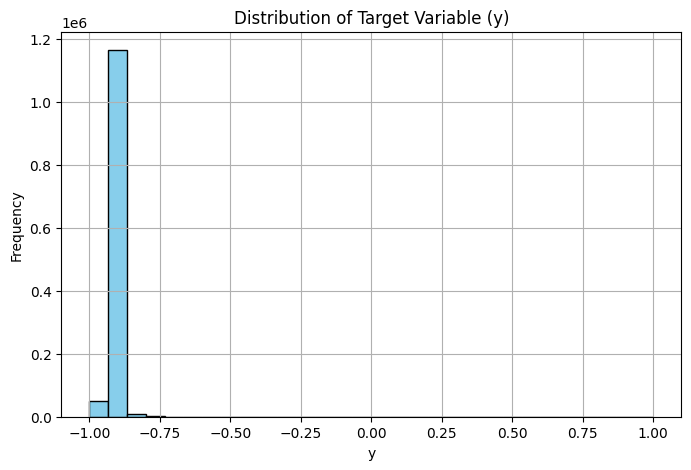

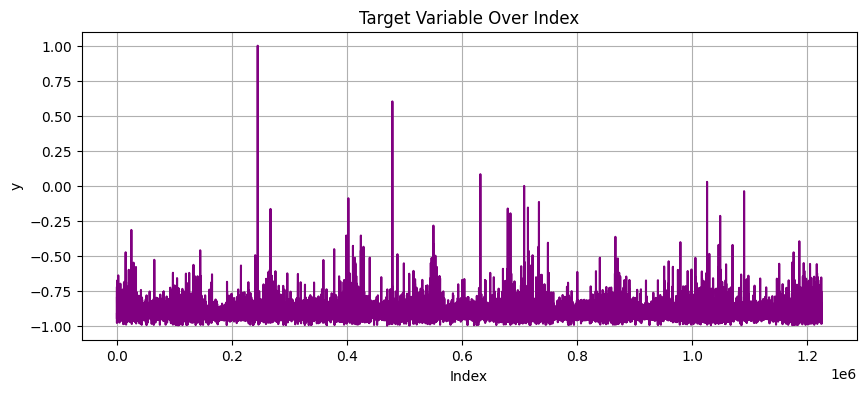

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y is your target variable

# 1. Basic summary statistics
print("Target Variable Summary:")
print(y_train_scaled.describe())

# 2. Check for missing values
print("\nMissing values in y:", y_train_scaled.isnull().sum())

# 3. Plot histogram to see distribution
plt.figure(figsize=(8, 5))
plt.hist(y_train_scaled, bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Target Variable (y)")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Optional: line plot to inspect sequence (for time-series like data)
plt.figure(figsize=(10, 4))
plt.plot(y_train_scaled.values, color='purple')
plt.title("Target Variable Over Index")
plt.xlabel("Index")
plt.ylabel("y")
plt.grid(True)
plt.show()


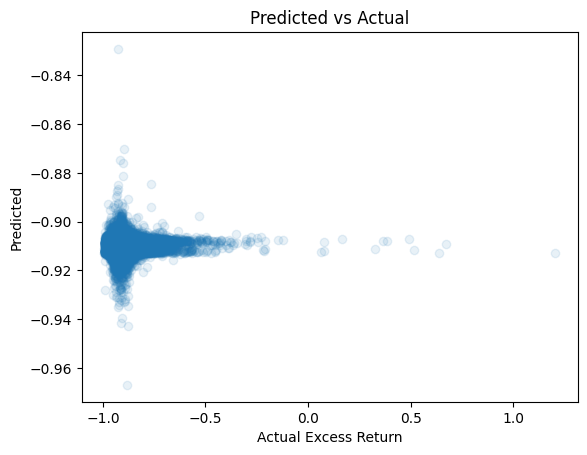

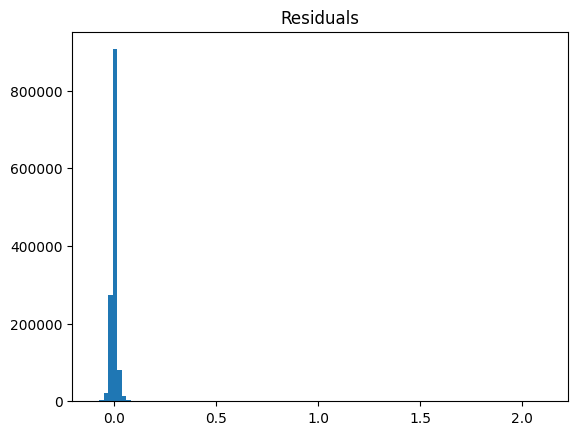

In [33]:
import matplotlib.pyplot as plt
y_pred = lr_model.predict(X_test_scaled)

plt.scatter(y_test_scaled, y_pred, alpha=0.1)
plt.xlabel("Actual Excess Return")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

plt.hist(y_test_scaled - y_pred, bins=100)
plt.title("Residuals")
plt.show()


In [18]:
import numpy as np
zero_ratio = np.mean(y_test_scaled == 0)
print(f"Ratio of zero targets: {zero_ratio:.2%}")


Ratio of zero targets: 0.00%


In [19]:
import numpy as np
pred_std = np.std(y_pred_test)
print(f"Std of predictions: {pred_std:.5f}")


Std of predictions: 0.10049


In [20]:
from sklearn.metrics import r2_score
print("Train R2:", r2_score(y_train_scaled, lr_model.predict(X_train_scaled)))
print("Test R2:", r2_score(y_test_scaled, lr_model.predict(X_test_scaled)))


Train R2: 0.010088288361470577
Test R2: -0.06897555766723795


In [60]:
model = LinearRegression()
model.fit(X_train_sel, y_train_scaled)
y_pred = model.predict(X_test_sel)

from sklearn.metrics import r2_score
print("Train R²:", r2_score(y_train_scaled, model.predict(X_train_sel)))
print("Test R²:", r2_score(y_test_scaled, y_pred))


Train R²: 0.001874367672532573
Test R²: -0.05479686690983532


In [ ]:
selected_features = [
    'ret', 'Price', 'STreversal', 'MaxRet', 'RealizedVol', 'IdioVol3F', 'IdioVolAHT', 'Coskewness', 
    'zerotrade6M', 'BidAskSpread', 'zerotrade12M', 'FirmAge', 'MomSeasonShort', 'VolumeTrend', 
    'ConvDebt', 'MRreversal', 'ResidualMomentum', 'MomSeason', 'MomOffSeason', 'ChInv', 'DelCOA', 
    'Accruals', 'DelFINL', 'DelEqu', 'LRreversal', 'AnnouncementReturn', 'NumEarnIncrease', 
    'DebtIssuance', 'IndRetBig', 'MomSeason06YrPlus'
]

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test set
y_pred_test = lr_model.predict(X_test_scaled)

# Evaluate performance on the validation set
mse_test = mean_squared_error(y_test_scaled, y_pred_test)
r2_test = r2_score(y_test_scaled, y_pred_test)

print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Mean Squared Error on Test Set: 0.00021832981037179367
R-squared on Test Set: 0.012315475919254526
